# Supervised Modelling

---
### <i>Changelogs:</i>

  Name  |  Date  |   Description
- **Kiet Vu**  |  03/23  | File Created.
- **Kiet Vu**  |  04/21  | Testing and modeling by Decision Trees Regression
- **Kiet Vu**  |  04/23  | Remodelling Decision Trees Regression since many columns are unimportant/ continous data
---

- **[Setting Independent and Dependent Variables for Training](#Variables)**
<br>
- **[Logistic Regression](#LogisticRegression)**:
This is a popular statistical method used for binary classification problems. You can use logistic regression to predict the target variable based on the categorical attributes.
        Columns chosen:
<br>

- **[Decision Trees](#DecisionTrees)**:
Decision trees are a popular algorithm for classification problems, especially when the data has categorical attributes. Decision trees can be used to split the data based on the categories of the attributes, and make a prediction based on the majority class at each leaf node.
        
        Columns chosen:
'unique_identifier','usage','status',
"B2B_EMPLOYEE_SIZE",
"B2B_BUSINESS_SQUARE_FOOT_NUM",
"B2B_BIG_BUSINESS_INDICATOR",
"B2B_SMALL_SIZE_FLAG",
"B2B_MEDIUM_SIZE_FLAG",
"B2B_HIGH_TECH_FLAG",
"B2B_TELECOMMUNICATIONS_CODE",
"B2B_UTILITY_CODE",
"B2B_COMPUTER_EXPENSE_CODE",
"B2B_PURCHASE_PRINT_EXPENSE_CODE",
"CAC_SEGMENT",
"B2B_WHITE_COLLAR_PRCNT"

<br>

- **[Random Forests](#RandomForests)**: 
Random forests are an ensemble method that combines multiple decision trees to improve the accuracy of the predictions. Random forests are especially useful for high-dimensional datasets with a large number of categorical attributes.
        Columns chosen:
<br>

- **[Naive Bayes](#NaiveBayers)**: 
Naive Bayes is a simple probabilistic algorithm used for classification tasks. It assumes that the attributes are conditionally independent given the target variable, and uses Bayes' theorem to calculate the probability of each class given the attributes.
        Columns chosen:
<br>

- **[K-Nearest Neighbor (K-NN)](KNN)**: 
K-NN is a non-parametric algorithm that can be used for classification tasks. It works by finding the K nearest neighbors of a new data point based on the categorical attributes, and assigning a class label based on the majority class of the neighbors.
        Columns chosen:
        
---

## Import libraries and raw data

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv("Clean Data/ready_dataset_20230420.csv", low_memory=False)
df = data.copy()
df.head(30)

,unique_identifier,B2B_ADDR_ZIP5,B2B_ADDR_STATE,B2B_ACCEPT_CREDIT_CARD_FLAG,B2B_ACCOUNTING_EXPENSE_CODE,B2B_AD_SIZE,B2B_ADVERTISING_EXPENSE_CODE,B2B_BIG_BUSINESS_INDICATOR,B2B_BUSINESS_DESCRIP_FLAG,B2B_BUSINESS_GROW_FLAG,...,B2B_TENANT_FLAG,B2B_TRUE_FRNCHSE_FLAG,B2B_UTILITY_CODE,B2B_WEALTH_FLAG,B2B_WHITE_COLLAR_FLAG,B2B_WHITE_COLLAR_PRCNT,B2B_YEAR_SIC_ADD,CAC_SEGMENT,usage,status
0,0001230a214b39e0e5c463bfe440fb15,44240,OH,NaN,C,A,A,N,N,C,...,NaN,2.0,D,NaN,NaN,25.0,201801.0,Manufacturing,81440.0,FINALLED
1,000345e997e72b61b990d2689c76427f,15218,PA,NaN,D,A,C,N,N,NaN,...,A,NaN,B,NaN,1.0,99.0,198405.0,Business and Finance,556.3,ACTIVE
2,0003c4d7aeb24f319f0d7c6ddb60bb8f,44067,OH,ADMV,C,B,B,N,N,C,...,A,2.0,A,1.0,NaN,16.0,201909.0,Personal Services,32564.0,FINALLED
3,00082675e86a9f3cf5fdcc5d4cd9114d,60618,IL,NaN,D,NaN,B,N,N,C,...,NaN,2.0,C,NaN,NaN,21.0,199104.0,Blue Collar Work,5519.0,FINALLED
4,00095201031df44962513f378842d521,61111,IL,DMV,A,A,A,N,N,C,...,B,2.0,A,NaN,1.0,83.0,201303.0,General Merchandise,5946.0,ACTIVE
5,000a04481ee5acbb856a7c485a67423a,62526,IL,NaN,E,A,D,N,N,C,...,A,2.0,D,NaN,1.0,50.0,201902.0,Personal Services,75468.0,FINALLED
6,000bee0b537b676a975a15999776581f,2110,MA,NaN,C,B,C,N,N,C,...,NaN,1.0,A,NaN,NaN,10.0,202011.0,Food and Dining,88280.0,FINALLED
7,000c88d34beda722f7b559bb056b7809,78064,TX,ADMV,A,A,A,N,N,C,...,NaN,2.0,A,NaN,NaN,29.0,201303.0,Hotels and Educational Boarding,109258.0,ACTIVE
8,000f645a52095f72ec723133e2b0092c,45601,OH,NaN,D,NaN,A,N,N,C,...,C,2.0,B,NaN,1.0,97.0,202007.0,"Public, Health, and Social Services",9686.0,FINALLED
9,00109796f3c34d87f1ff2778498a8016,18330,PA,NaN,NaN,NaN,NaN,N,N,NaN,...,NaN,2.0,NaN,NaN,NaN,0.0,201909.0,Unknown,65700.0,FINALLED


---
## Setting Independent and Dependent Variables for Training <a class="anchor" id="Variables"></a>

---
## Logistic Regression <a class="anchor" id="LogisticRegression"></a>

---
## Decision Trees <a class="anchor" id="DecisionTrees"></a>

https://towardsdatascience.com/decision-tree-ba64f977f7c3
https://www.kaggle.com/code/arpikr/decision-tree-regression-model
https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/

In [3]:
from sklearn.model_selection import train_test_split

df_train_data = df[['unique_identifier','usage','status',
"B2B_EMPLOYEE_SIZE",
"B2B_BUSINESS_SQUARE_FOOT_NUM",
"B2B_BIG_BUSINESS_INDICATOR",
"B2B_SMALL_SIZE_FLAG",
"B2B_MEDIUM_SIZE_FLAG",
"B2B_HIGH_TECH_FLAG",
"B2B_TELECOMMUNICATIONS_CODE",
"B2B_UTILITY_CODE",
"B2B_COMPUTER_EXPENSE_CODE",
"B2B_PURCHASE_PRINT_EXPENSE_CODE",
"CAC_SEGMENT",
"B2B_WHITE_COLLAR_PRCNT"]]
df_train_data

unique_identifier	B2B_ADDR_ZIP5	B2B_ADDR_STATE	B2B_ACCEPT_CREDIT_CARD_FLAG	B2B_ACCOUNTING_EXPENSE_CODE	B2B_AD_SIZE	B2B_ADVERTISING_EXPENSE_CODE	B2B_BIG_BUSINESS_INDICATOR	B2B_BUSINESS_DESCRIP_FLAG	B2B_BUSINESS_GROW_FLAG	B2B_BUSINESS_SQUARE_FOOT_NUM	B2B_CALL_STATUS	B2B_COMPUTER_EXPENSE_CODE	B2B_CONTRACT_LABOR_EXPENSE_CODE	B2B_CREDIT_FLAG	B2B_CREDIT_GRADE	B2B_CREDIT_SCORE	B2B_CREDIT_YEAR	B2B_EMPLOYEE_DERVTN_FLAG	B2B_EMPLOYEE_NUM	B2B_EMPLOYEE_SIZE	B2B_EXPENSE_TYPE	B2B_FIRST_YEAR_CCYY	B2B_HIGH_INCOME_EXEC_FLAG	B2B_HIGH_TECH_FLAG	B2B_INDIVIDUAL_FLAG	B2B_INSURANCE_EXPENSE_CODE	B2B_LEGAL_EXPENSE_CODE	B2B_MEDIUM_SIZE_FLAG	B2B_MULTI_EXEC_FLAG	B2B_MULTI_TENANT_DESCRIP	B2B_NAICS_CODE	B2B_NAICS_CODE_DESCRIP	B2B_NAICS1	B2B_NAICS1_DESCRIP	B2B_NAICS2	B2B_NAICS2_DESCRIP	B2B_NUM_TENANATS	B2B_OFFICE_SUPPLY_EXPENSE_CODE	B2B_PACKAGE_EXPENSE_CODE	B2B_PAY_AT_PUMP_FLAG	B2B_PAYROLL_EXPENSE_CODE	B2B_POP_DENSITY	B2B_PRIMARY_SIC	B2B_PRIMARY_SIC_DESCRIP	B2B_PRIMARY_SIC_FLAG	B2B_PRIMARY_SITE_FLAG	B2B_PRODUCTION_DATE	B2B_PURCHASE_ADMIN_EXPENSE_CODE	B2B_PURCHASE_PRINT_EXPENSE_CODE	B2B_REST_LEASE_EXPENSE_CODE	B2B_SALES_VOLUME	B2B_SALES_VOLUME_ESTIM	B2B_SECONDARY_SIC_CODE1	B2B_SECONDARY_SIC_CODE2	B2B_SECONDARY_SIC_DESCRIP1	B2B_SECONDARY_SIC_DESCRIP2	B2B_SIC_CODE	B2B_SIC_DESCRIP	B2B_SMALL_SIZE_FLAG	B2B_STATE_CODE	B2B_TELECOMMUNICATIONS_CODE	B2B_TENANT_FLAG	B2B_TRUE_FRNCHSE_FLAG	B2B_UTILITY_CODE	B2B_WEALTH_FLAG	B2B_WHITE_COLLAR_FLAG	B2B_WHITE_COLLAR_PRCNT	B2B_YEAR_SIC_ADD	CAC_SEGMENT	usage	status


In [4]:
independents = df.drop(['B2B_BUSINESS_GROW_FLAG', 'B2B_CALL_STATUS','B2B_CREDIT_GRADE','B2B_CREDIT_SCORE',
                       'B2B_EMPLOYEE_NUM','B2B_EMPLOYEE_SIZE',"B2B_MULTI_EXEC_FLAG",
                       "B2B_MULTI_TENANT_DESCRIP","B2B_NAICS_CODE","B2B_NAICS1","B2B_NAICS2","B2B_NUM_TENANATS",
                       "B2B_POP_DENSITY", "B2B_PRIMARY_SIC","B2B_PRODUCTION_DATE","B2B_SALES_VOLUME_ESTIM",
                       "B2B_SECONDARY_SIC_CODE1","B2B_SECONDARY_SIC_CODE2","B2B_SIC_CODE","B2B_WHITE_COLLAR_PRCNT",
                       "B2B_YEAR_SIC_ADD"], axis=1)

independents

,unique_identifier,B2B_ADDR_ZIP5,B2B_ADDR_STATE,B2B_ACCEPT_CREDIT_CARD_FLAG,B2B_ACCOUNTING_EXPENSE_CODE,B2B_AD_SIZE,B2B_ADVERTISING_EXPENSE_CODE,B2B_BIG_BUSINESS_INDICATOR,B2B_BUSINESS_DESCRIP_FLAG,B2B_BUSINESS_SQUARE_FOOT_NUM,...,B2B_STATE_CODE,B2B_TELECOMMUNICATIONS_CODE,B2B_TENANT_FLAG,B2B_TRUE_FRNCHSE_FLAG,B2B_UTILITY_CODE,B2B_WEALTH_FLAG,B2B_WHITE_COLLAR_FLAG,CAC_SEGMENT,usage,status
0,0001230a214b39e0e5c463bfe440fb15,44240,OH,NaN,C,A,A,N,N,6,...,39.0,B,NaN,2.0,D,NaN,NaN,Manufacturing,81440.0,FINALLED
1,000345e997e72b61b990d2689c76427f,15218,PA,NaN,D,A,C,N,N,A,...,42.0,D,A,NaN,B,NaN,1.0,Business and Finance,556.3,ACTIVE
2,0003c4d7aeb24f319f0d7c6ddb60bb8f,44067,OH,ADMV,C,B,B,N,N,3,...,39.0,B,A,2.0,A,1.0,NaN,Personal Services,32564.0,FINALLED
3,00082675e86a9f3cf5fdcc5d4cd9114d,60618,IL,NaN,D,NaN,B,N,N,2,...,17.0,C,NaN,2.0,C,NaN,NaN,Blue Collar Work,5519.0,FINALLED
4,00095201031df44962513f378842d521,61111,IL,DMV,A,A,A,N,N,3,...,17.0,A,B,2.0,A,NaN,1.0,General Merchandise,5946.0,ACTIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49479,fff7c0d1b2f896b1018ef67a9d286361,2472,MA,NaN,B,NaN,A,N,N,2,...,25.0,A,NaN,2.0,A,NaN,1.0,Business and Finance,11980.0,FINALLED
49480,fffce8918ebaae88423f62806f22c414,2026,MA,NaN,C,A,A,N,N,2,...,25.0,B,A,2.0,A,1.0,1.0,Business and Finance,11080.0,ACTIVE
49481,fffd155082881fa090b08ca6ceed7005,78503,TX,NaN,B,NaN,A,N,N,2,...,48.0,A,A,2.0,B,NaN,NaN,Auto,93876.0,ACTIVE
49482,fffe3fcb6ca0166ec15af3958ac145e8,2453,MA,NaN,C,A,B,N,N,3,...,25.0,B,NaN,2.0,A,NaN,NaN,Personal Services,9072.0,ACTIVE


In [5]:
independents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49484 entries, 0 to 49483
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   unique_identifier                49484 non-null  object 
 1   B2B_ADDR_ZIP5                    49484 non-null  int64  
 2   B2B_ADDR_STATE                   49484 non-null  object 
 3   B2B_ACCEPT_CREDIT_CARD_FLAG      12526 non-null  object 
 4   B2B_ACCOUNTING_EXPENSE_CODE      40247 non-null  object 
 5   B2B_AD_SIZE                      28766 non-null  object 
 6   B2B_ADVERTISING_EXPENSE_CODE     41895 non-null  object 
 7   B2B_BIG_BUSINESS_INDICATOR       49484 non-null  object 
 8   B2B_BUSINESS_DESCRIP_FLAG        49484 non-null  object 
 9   B2B_BUSINESS_SQUARE_FOOT_NUM     49484 non-null  object 
 10  B2B_COMPUTER_EXPENSE_CODE        41724 non-null  object 
 11  B2B_CONTRACT_LABOR_EXPENSE_CODE  40870 non-null  object 
 12  B2B_CREDIT_FLAG   

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

independents.iloc[:, 2:-2] = independents.iloc[:, 2:-2].apply(le.fit_transform)
independents


,unique_identifier,B2B_ADDR_ZIP5,B2B_ADDR_STATE,B2B_ACCEPT_CREDIT_CARD_FLAG,B2B_ACCOUNTING_EXPENSE_CODE,B2B_AD_SIZE,B2B_ADVERTISING_EXPENSE_CODE,B2B_BIG_BUSINESS_INDICATOR,B2B_BUSINESS_DESCRIP_FLAG,B2B_BUSINESS_SQUARE_FOOT_NUM,...,B2B_STATE_CODE,B2B_TELECOMMUNICATIONS_CODE,B2B_TENANT_FLAG,B2B_TRUE_FRNCHSE_FLAG,B2B_UTILITY_CODE,B2B_WEALTH_FLAG,B2B_WHITE_COLLAR_FLAG,CAC_SEGMENT,usage,status
0,0001230a214b39e0e5c463bfe440fb15,44240,6,73,2,0,0,0,0,5,...,6,1,3,1,3,1,1,7,81440.0,FINALLED
1,000345e997e72b61b990d2689c76427f,15218,7,73,3,0,2,0,0,8,...,7,3,0,2,1,1,0,3,556.3,ACTIVE
2,0003c4d7aeb24f319f0d7c6ddb60bb8f,44067,6,52,2,1,1,0,0,2,...,6,1,0,1,0,0,1,8,32564.0,FINALLED
3,00082675e86a9f3cf5fdcc5d4cd9114d,60618,1,73,3,4,1,0,0,1,...,1,2,3,1,2,1,1,2,5519.0,FINALLED
4,00095201031df44962513f378842d521,61111,1,62,0,0,0,0,0,2,...,1,0,1,1,0,1,0,5,5946.0,ACTIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49479,fff7c0d1b2f896b1018ef67a9d286361,2472,2,73,1,4,0,0,0,1,...,3,0,3,1,0,1,0,3,11980.0,FINALLED
49480,fffce8918ebaae88423f62806f22c414,2026,2,73,2,0,0,0,0,1,...,3,1,0,1,0,0,0,3,11080.0,ACTIVE
49481,fffd155082881fa090b08ca6ceed7005,78503,8,73,1,4,0,0,0,1,...,8,0,0,1,1,1,1,1,93876.0,ACTIVE
49482,fffe3fcb6ca0166ec15af3958ac145e8,2453,2,73,2,0,1,0,0,2,...,3,1,3,1,0,1,1,8,9072.0,ACTIVE


In [7]:
independents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49484 entries, 0 to 49483
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   unique_identifier                49484 non-null  object 
 1   B2B_ADDR_ZIP5                    49484 non-null  int64  
 2   B2B_ADDR_STATE                   49484 non-null  int64  
 3   B2B_ACCEPT_CREDIT_CARD_FLAG      49484 non-null  int64  
 4   B2B_ACCOUNTING_EXPENSE_CODE      49484 non-null  int64  
 5   B2B_AD_SIZE                      49484 non-null  int64  
 6   B2B_ADVERTISING_EXPENSE_CODE     49484 non-null  int64  
 7   B2B_BIG_BUSINESS_INDICATOR       49484 non-null  int64  
 8   B2B_BUSINESS_DESCRIP_FLAG        49484 non-null  int64  
 9   B2B_BUSINESS_SQUARE_FOOT_NUM     49484 non-null  int64  
 10  B2B_COMPUTER_EXPENSE_CODE        49484 non-null  int64  
 11  B2B_CONTRACT_LABOR_EXPENSE_CODE  49484 non-null  int64  
 12  B2B_CREDIT_FLAG   

In [8]:
#sns.set(rc={'figure.figsize':(35,16)}) #35,16
#sns.pairplot(independents,palette='Set1')


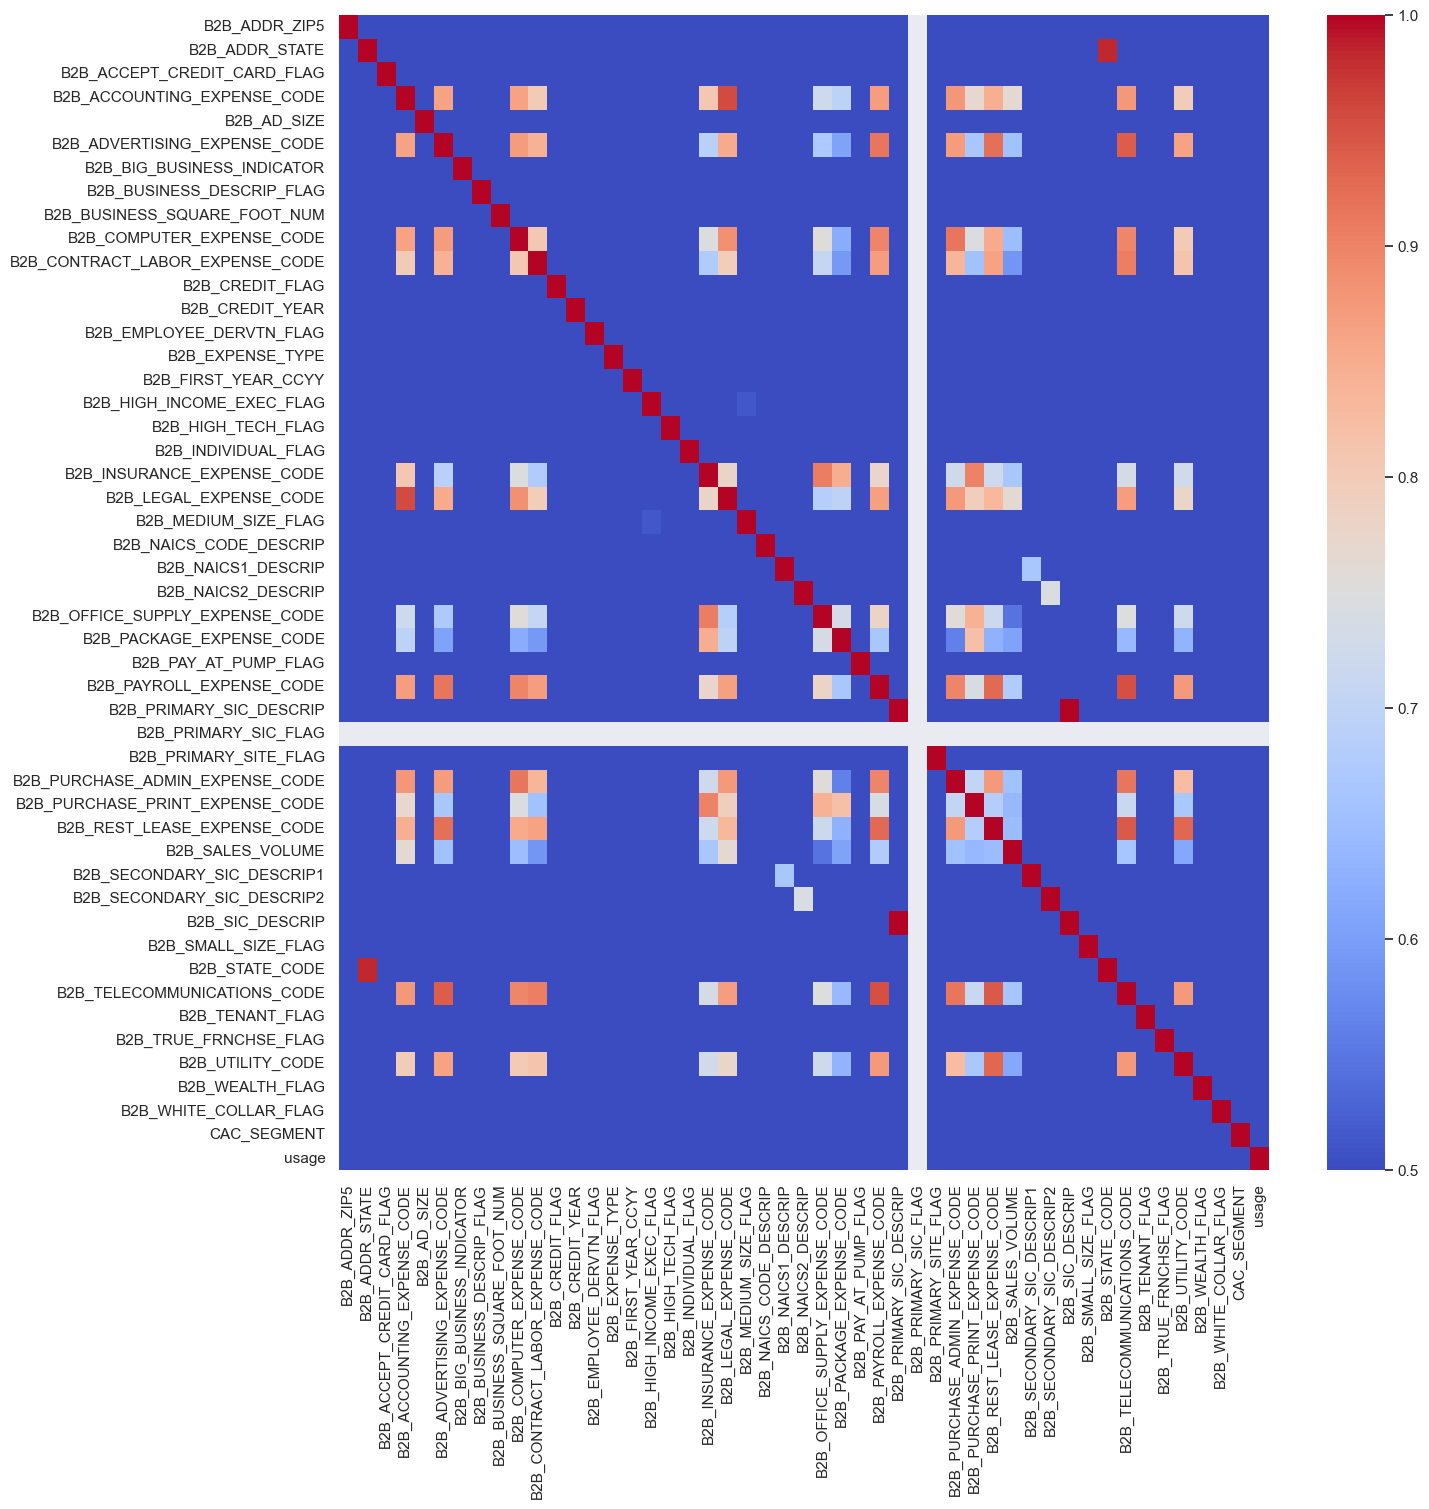

In [9]:
sns.set (rc = {'figure.figsize':(15, 15)})
sns.heatmap(independents.iloc[:,1:-1].corr(),cmap='coolwarm',vmin=.5)
plt.show()

In [10]:
X = independents.iloc[:,2:-2]
y = df["usage"]

In [11]:
y

0        81440.0
1          556.3
2        32564.0
3         5519.0
4         5946.0
          ...   
49479    11980.0
49480    11080.0
49481    93876.0
49482     9072.0
49483    20892.0
Name: usage, Length: 49484, dtype: float64

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49484 entries, 0 to 49483
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   B2B_ADDR_STATE                   49484 non-null  int64
 1   B2B_ACCEPT_CREDIT_CARD_FLAG      49484 non-null  int64
 2   B2B_ACCOUNTING_EXPENSE_CODE      49484 non-null  int64
 3   B2B_AD_SIZE                      49484 non-null  int64
 4   B2B_ADVERTISING_EXPENSE_CODE     49484 non-null  int64
 5   B2B_BIG_BUSINESS_INDICATOR       49484 non-null  int64
 6   B2B_BUSINESS_DESCRIP_FLAG        49484 non-null  int64
 7   B2B_BUSINESS_SQUARE_FOOT_NUM     49484 non-null  int64
 8   B2B_COMPUTER_EXPENSE_CODE        49484 non-null  int64
 9   B2B_CONTRACT_LABOR_EXPENSE_CODE  49484 non-null  int64
 10  B2B_CREDIT_FLAG                  49484 non-null  int64
 11  B2B_CREDIT_YEAR                  49484 non-null  int64
 12  B2B_EMPLOYEE_DERVTN_FLAG         49484 non-nul

In [13]:
for i in X:
    X[i] = X[i].astype('float64')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49484 entries, 0 to 49483
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   B2B_ADDR_STATE                   49484 non-null  float64
 1   B2B_ACCEPT_CREDIT_CARD_FLAG      49484 non-null  float64
 2   B2B_ACCOUNTING_EXPENSE_CODE      49484 non-null  float64
 3   B2B_AD_SIZE                      49484 non-null  float64
 4   B2B_ADVERTISING_EXPENSE_CODE     49484 non-null  float64
 5   B2B_BIG_BUSINESS_INDICATOR       49484 non-null  float64
 6   B2B_BUSINESS_DESCRIP_FLAG        49484 non-null  float64
 7   B2B_BUSINESS_SQUARE_FOOT_NUM     49484 non-null  float64
 8   B2B_COMPUTER_EXPENSE_CODE        49484 non-null  float64
 9   B2B_CONTRACT_LABOR_EXPENSE_CODE  49484 non-null  float64
 10  B2B_CREDIT_FLAG                  49484 non-null  float64
 11  B2B_CREDIT_YEAR                  49484 non-null  float64
 12  B2B_EMPLOYEE_DERVT

Split the data to train with test size = 30% , train size = 70%

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

The main difference between a decision tree classifier and a decision tree regressor in scikit-learn is the type of output they produce.

A decision tree classifier is used when the target variable is categorical or qualitative in nature, meaning that it takes on discrete values or categories. The classifier will build a tree-like model that partitions the data into smaller and smaller subsets based on the values of the independent variables, and assigns a class label to each subset based on the majority class of the instances in that subset. The output of the classifier is a discrete class label or category for each instance in the data.

On the other hand, a decision tree regressor is used when the target variable is continuous or quantitative in nature, meaning that it takes on a range of values. The regressor will build a tree-like model that partitions the data into smaller and smaller subsets based on the values of the independent variables, and assigns a numeric value to each subset based on the mean or median value of the instances in that subset. The output of the regressor is a continuous value or range of values for each instance in the data.

In summary, the decision tree classifier and decision tree regressor differ in the type of output they produce - discrete class labels for the classifier, and continuous values for the regressor - and the type of target variable they are designed to hand

In [15]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [16]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [17]:
dtree.score(X_train,y_train)

0.9884547033712854

In [18]:
dtree.score(X_test,y_test)

-0.7157267765778281

evaluate the decision tree

In [19]:
y_pred= dtree.predict(X_test)

Mean squared error: 61179318137.66
Mean absolute error: 84240.84
R-squared: -0.72


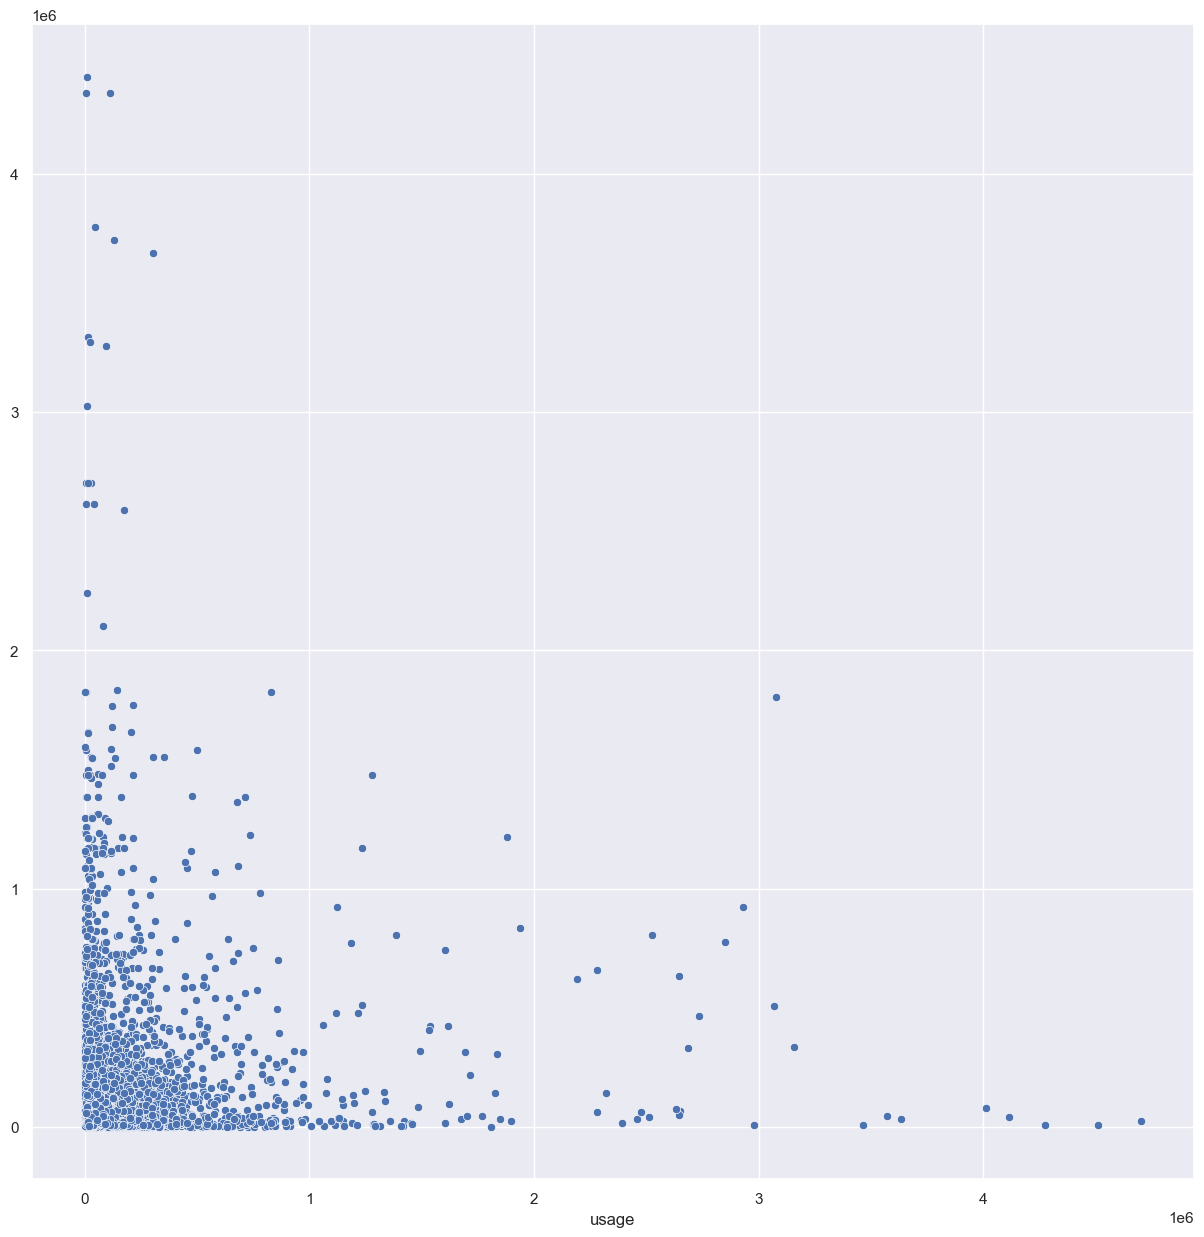

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate evaluation metrics using predicted values and actual values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualize the predicted values and actual values using a scatter plot
sns.scatterplot(x=y_test, y=y_pred)

# Display the evaluation metrics
print("Mean squared error: {:.2f}".format(mse))
print("Mean absolute error: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))

Visualize the evaluation of the model

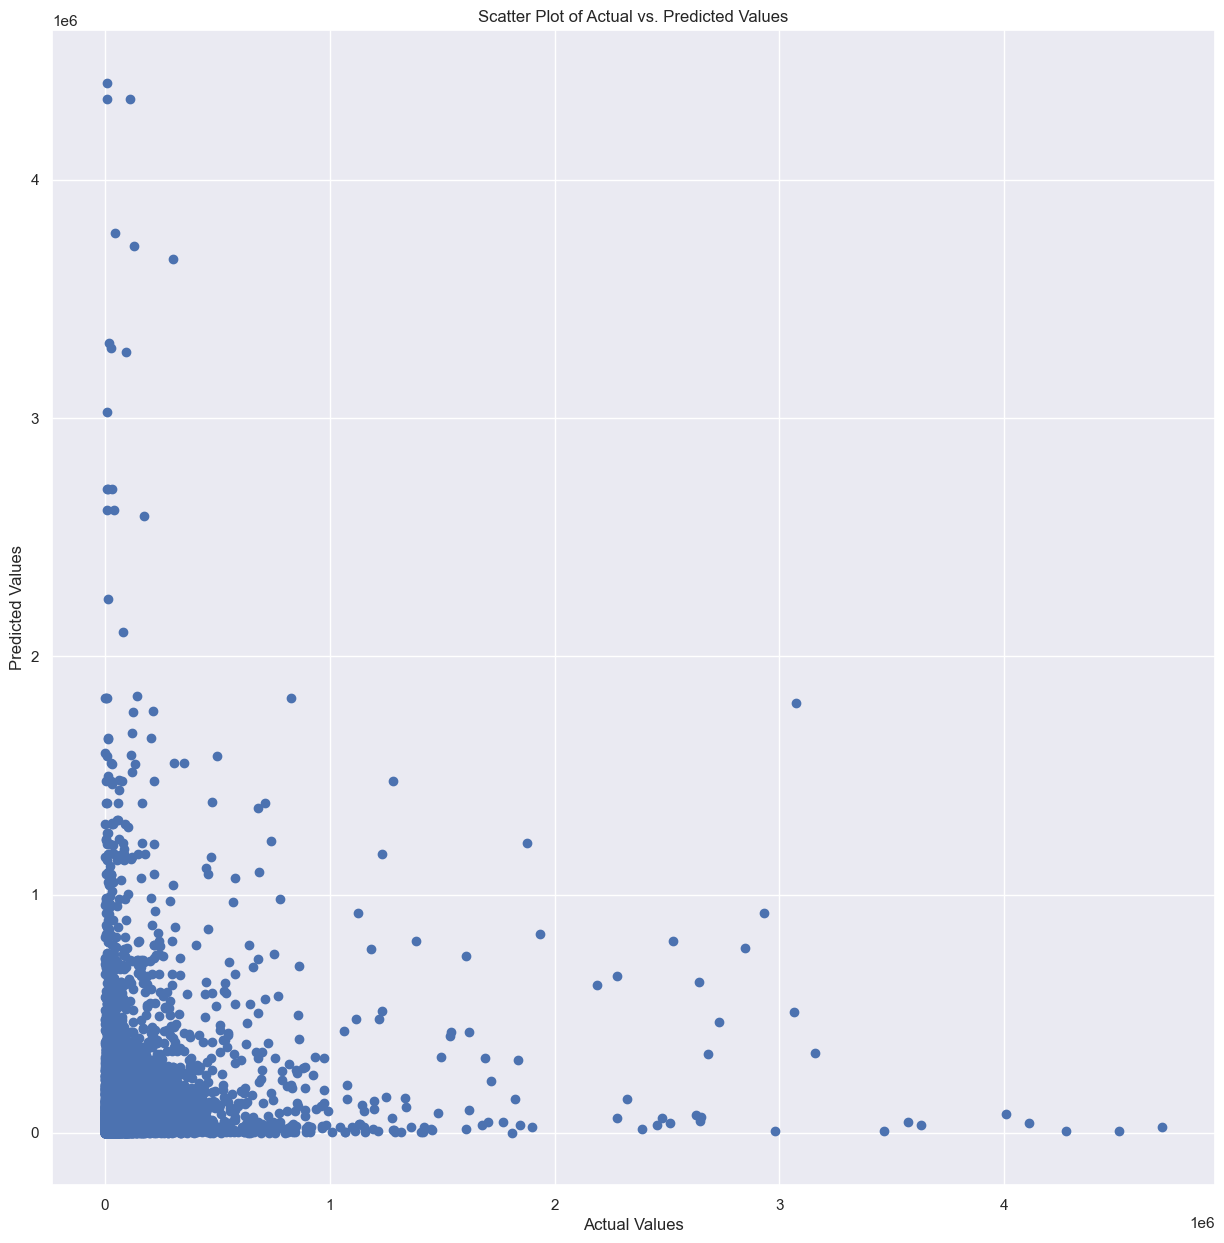

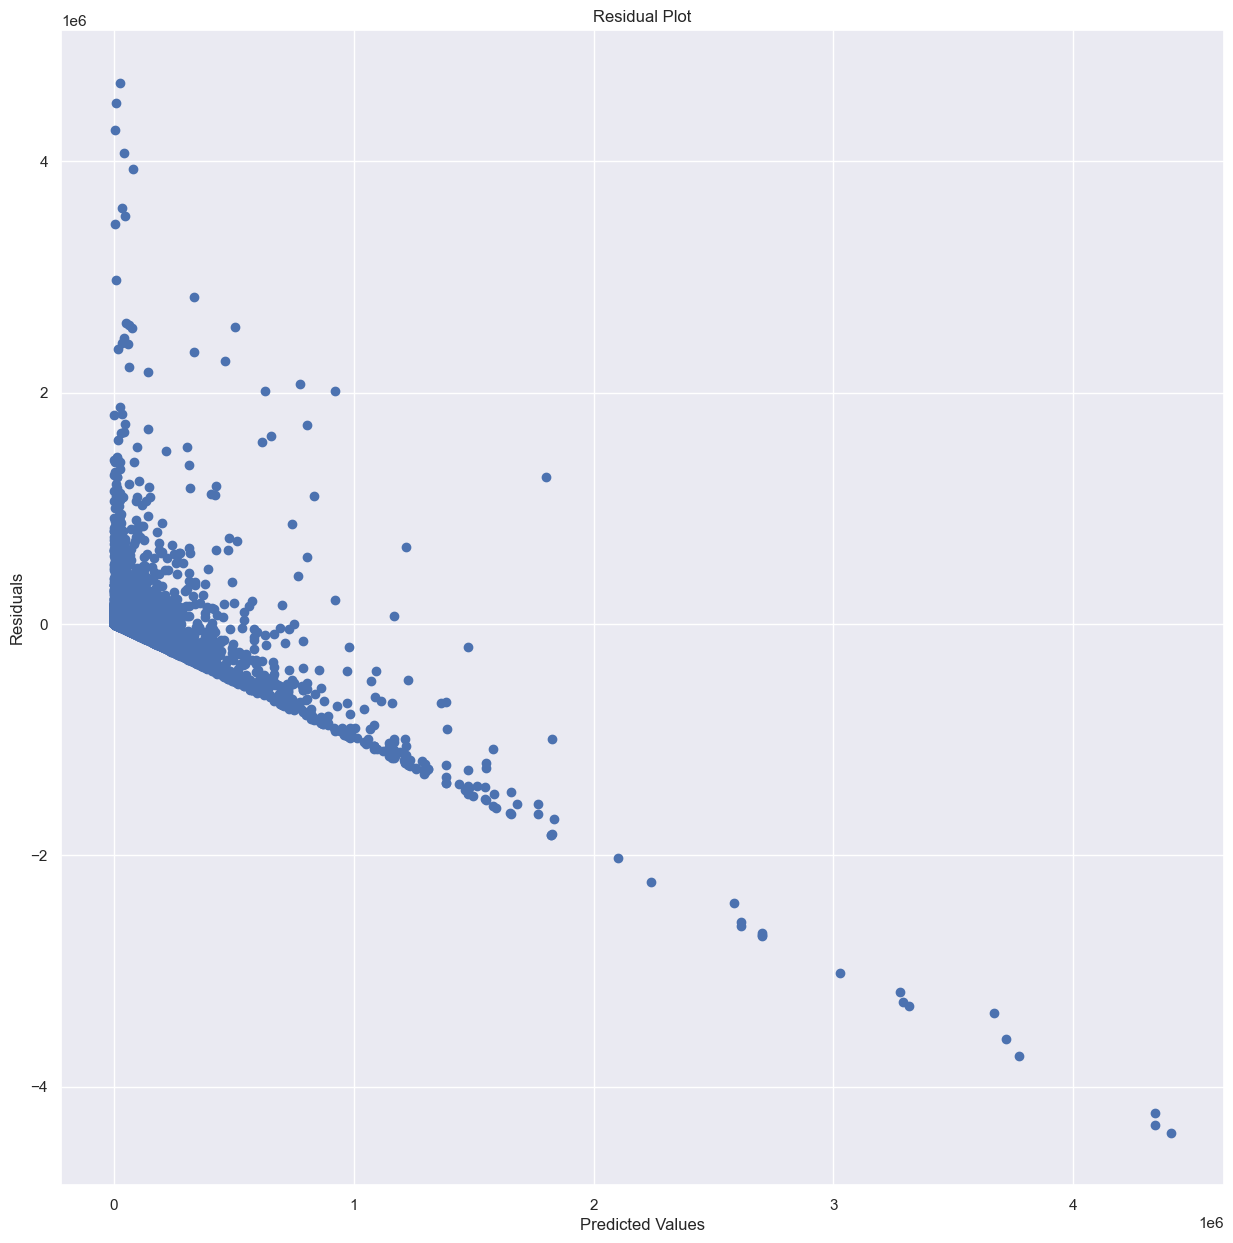

R-squared: -0.7157267765778281


In [21]:
# Create a scatter plot of the predicted values versus the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.show()

# Create a residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Calculate the R-squared value
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)

In [22]:
dtree.feature_importances_
pd.Series(dtree.feature_importances_,index=X_train.columns).sort_values(ascending=False)

B2B_FIRST_YEAR_CCYY                0.072707
B2B_UTILITY_CODE                   0.057631
B2B_NAICS_CODE_DESCRIP             0.057239
B2B_BIG_BUSINESS_INDICATOR         0.054929
B2B_SECONDARY_SIC_DESCRIP1         0.044063
B2B_BUSINESS_SQUARE_FOOT_NUM       0.043988
B2B_CREDIT_YEAR                    0.042955
B2B_STATE_CODE                     0.040321
B2B_SIC_DESCRIP                    0.038993
B2B_PAY_AT_PUMP_FLAG               0.037912
B2B_NAICS1_DESCRIP                 0.036780
B2B_TENANT_FLAG                    0.032591
CAC_SEGMENT                        0.032397
B2B_PRIMARY_SIC_DESCRIP            0.029542
B2B_ADDR_STATE                     0.025675
B2B_PACKAGE_EXPENSE_CODE           0.024890
B2B_PAYROLL_EXPENSE_CODE           0.023115
B2B_SALES_VOLUME                   0.020378
B2B_REST_LEASE_EXPENSE_CODE        0.018922
B2B_LEGAL_EXPENSE_CODE             0.018687
B2B_CREDIT_FLAG                    0.018283
B2B_CONTRACT_LABOR_EXPENSE_CODE    0.018030
B2B_ADVERTISING_EXPENSE_CODE    

/Users/vanbui/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='usage', ylabel='Density'>

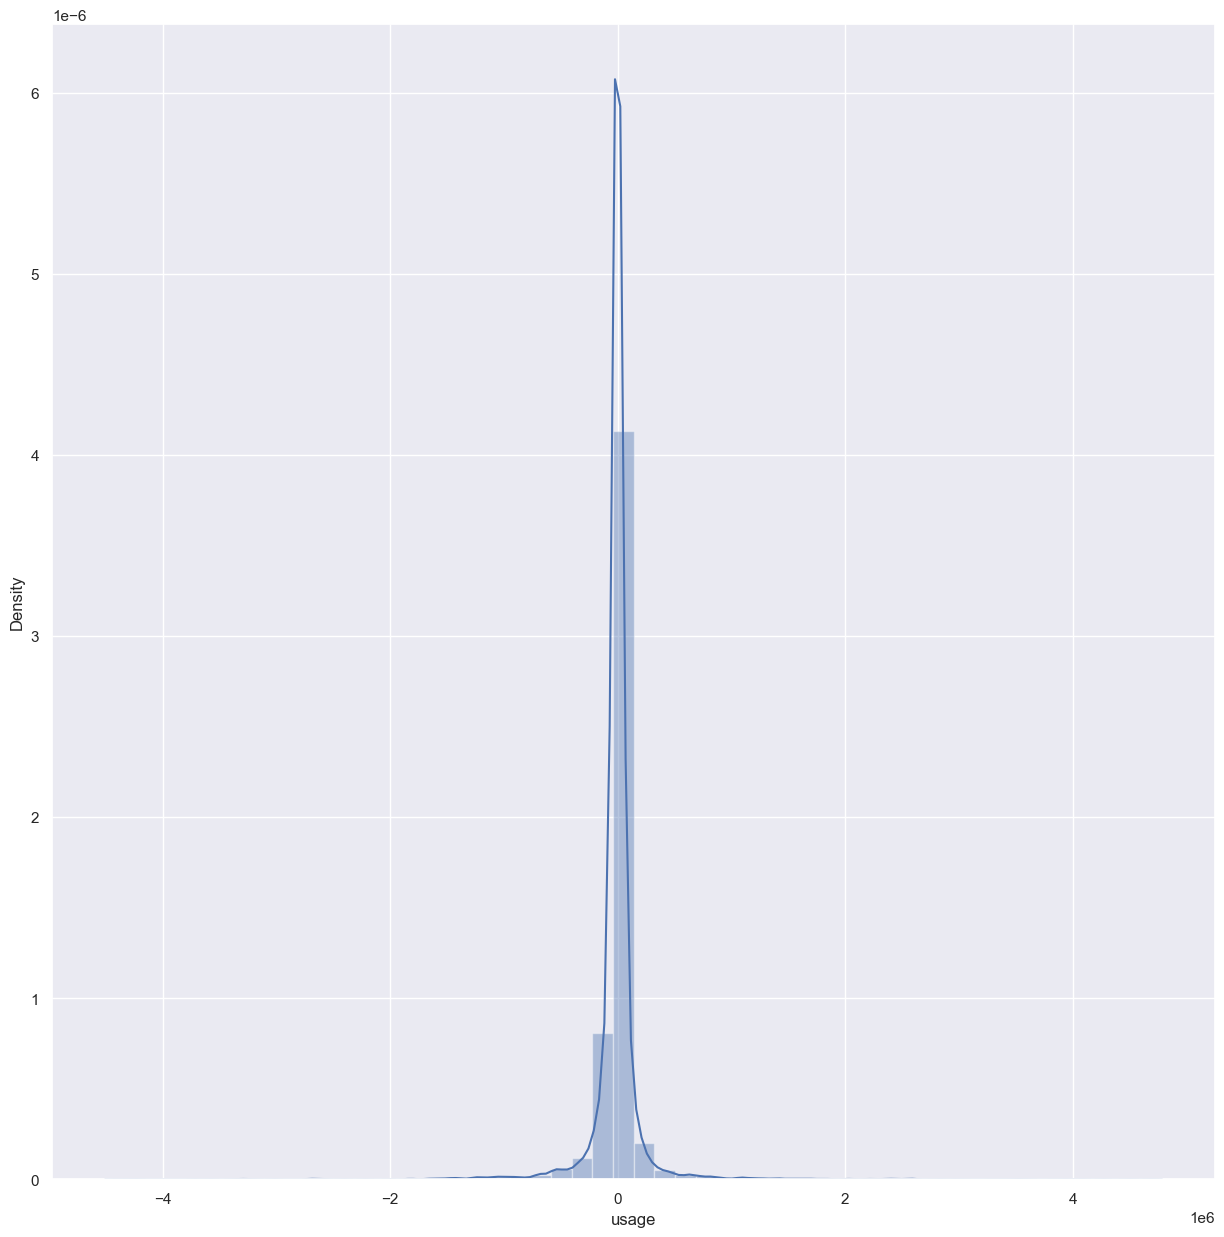

In [23]:
sns.distplot(y_test-y_pred)

Hyperparameter tuning

In [24]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [25]:
# calculating different regression metrics
from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(dtree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print(thour,":",tmin,':',round(tsec,2))

In [26]:
%%capture  
#(don't even run it, took me hours!!)
from datetime import datetime

start_time=timer(None)

#tuning_model.fit(X,y)

timer(start_time)

KeyboardInterrupt: 

In [27]:
# best hyperparameters 
tuning_model.best_params_

#{'max_depth': 5,
# 'max_features': 'auto',
# 'max_leaf_nodes': None,
# 'min_samples_leaf': 1,
# 'min_weight_fraction_leaf': 0.1,
# 'splitter': 'best'}

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [102]:
# best model score
tuning_model.best_score_

-29969388563.768692

In [103]:
dtree_tuned= DecisionTreeRegressor(max_depth=12,max_features='auto',max_leaf_nodes=20,min_samples_leaf=5,min_weight_fraction_leaf=0.1,splitter='random')

In [104]:
# fitting model
dtree_tuned.fit(X_train,y_train)

C:\Users\PREDATOR\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=12, max_features='auto', max_leaf_nodes=20,
                      min_samples_leaf=5, min_weight_fraction_leaf=0.1,
                      splitter='random')

In [105]:
# prediction 
y_tuned_pred=dtree_tuned.predict(X_test)

Mean squared error: 28568877842.79
Mean absolute error: 67648.96
R-squared: 0.05


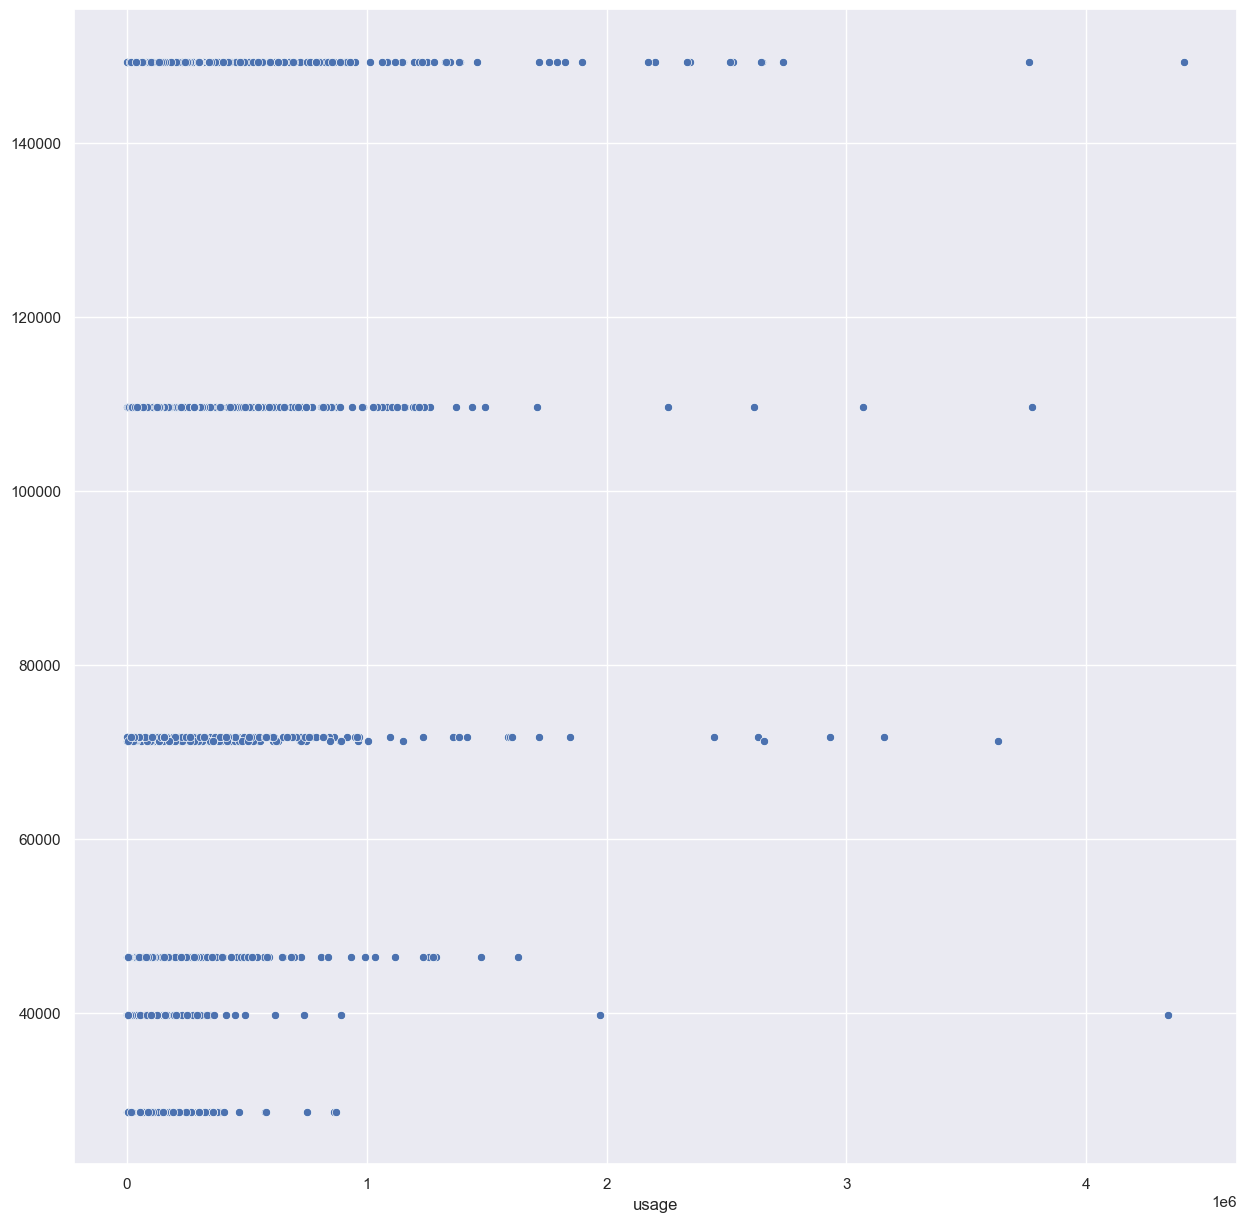

In [106]:
# Calculate evaluation metrics using predicted values and actual values
mse = mean_squared_error(y_test, y_tuned_pred)
mae = mean_absolute_error(y_test, y_tuned_pred)
r2 = r2_score(y_test, y_tuned_pred)

# Visualize the predicted values and actual values using a scatter plot
sns.scatterplot(x=y_test, y=y_tuned_pred)

# Display the evaluation metrics
print("Mean squared error: {:.2f}".format(mse))
print("Mean absolute error: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))

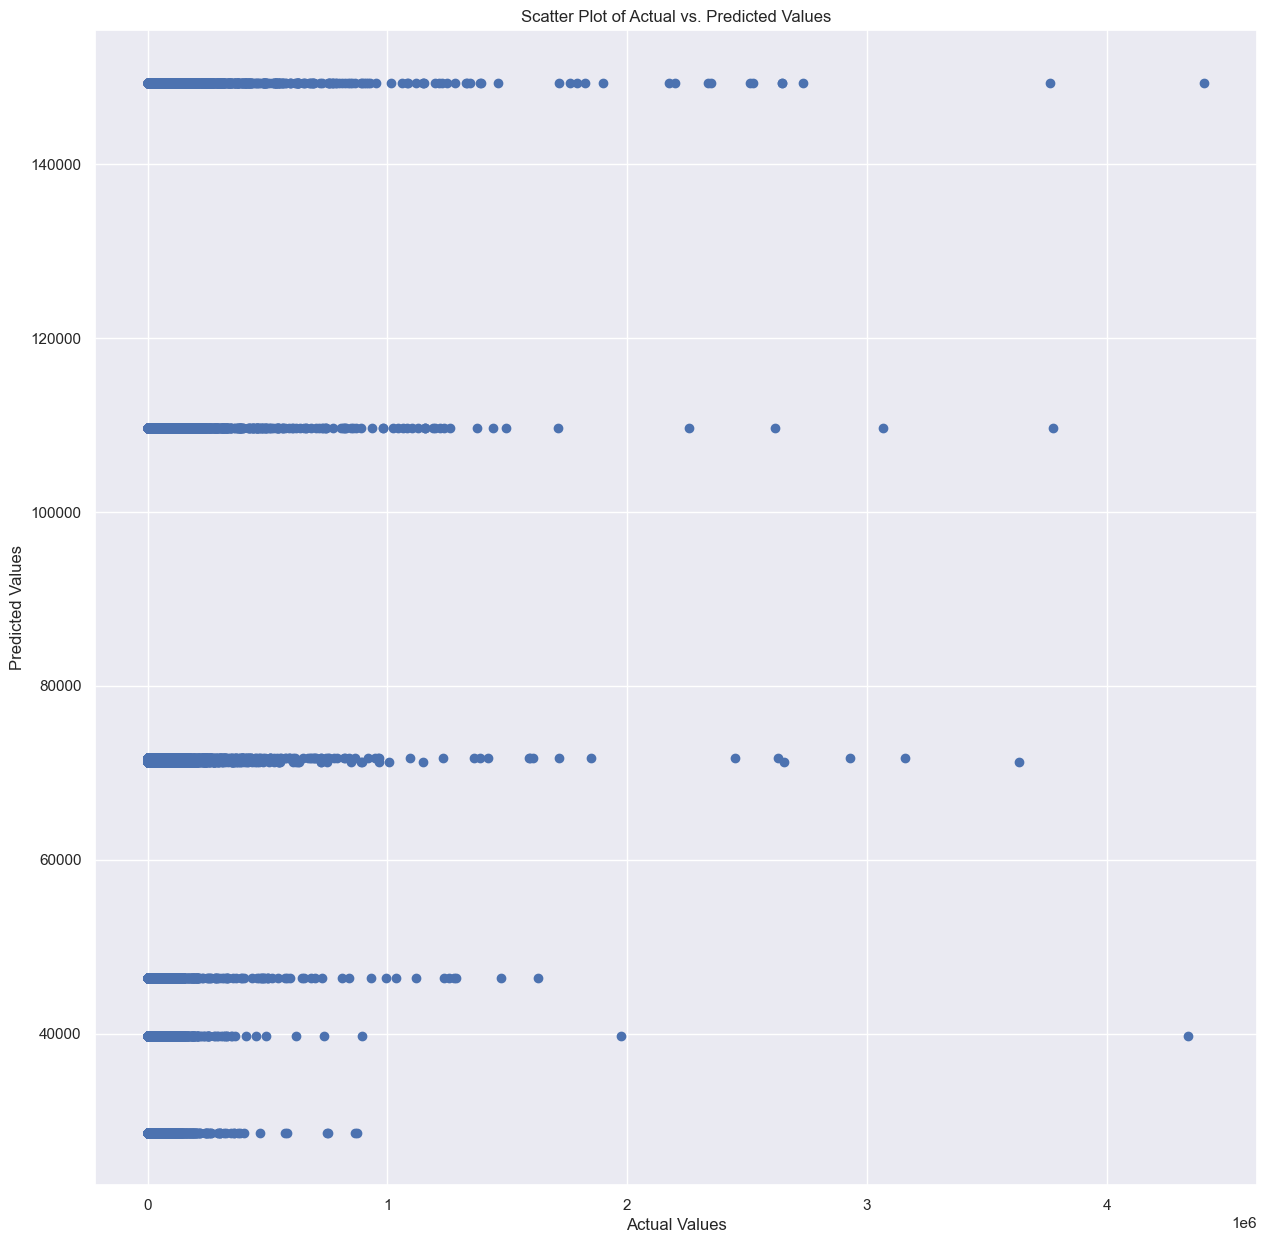

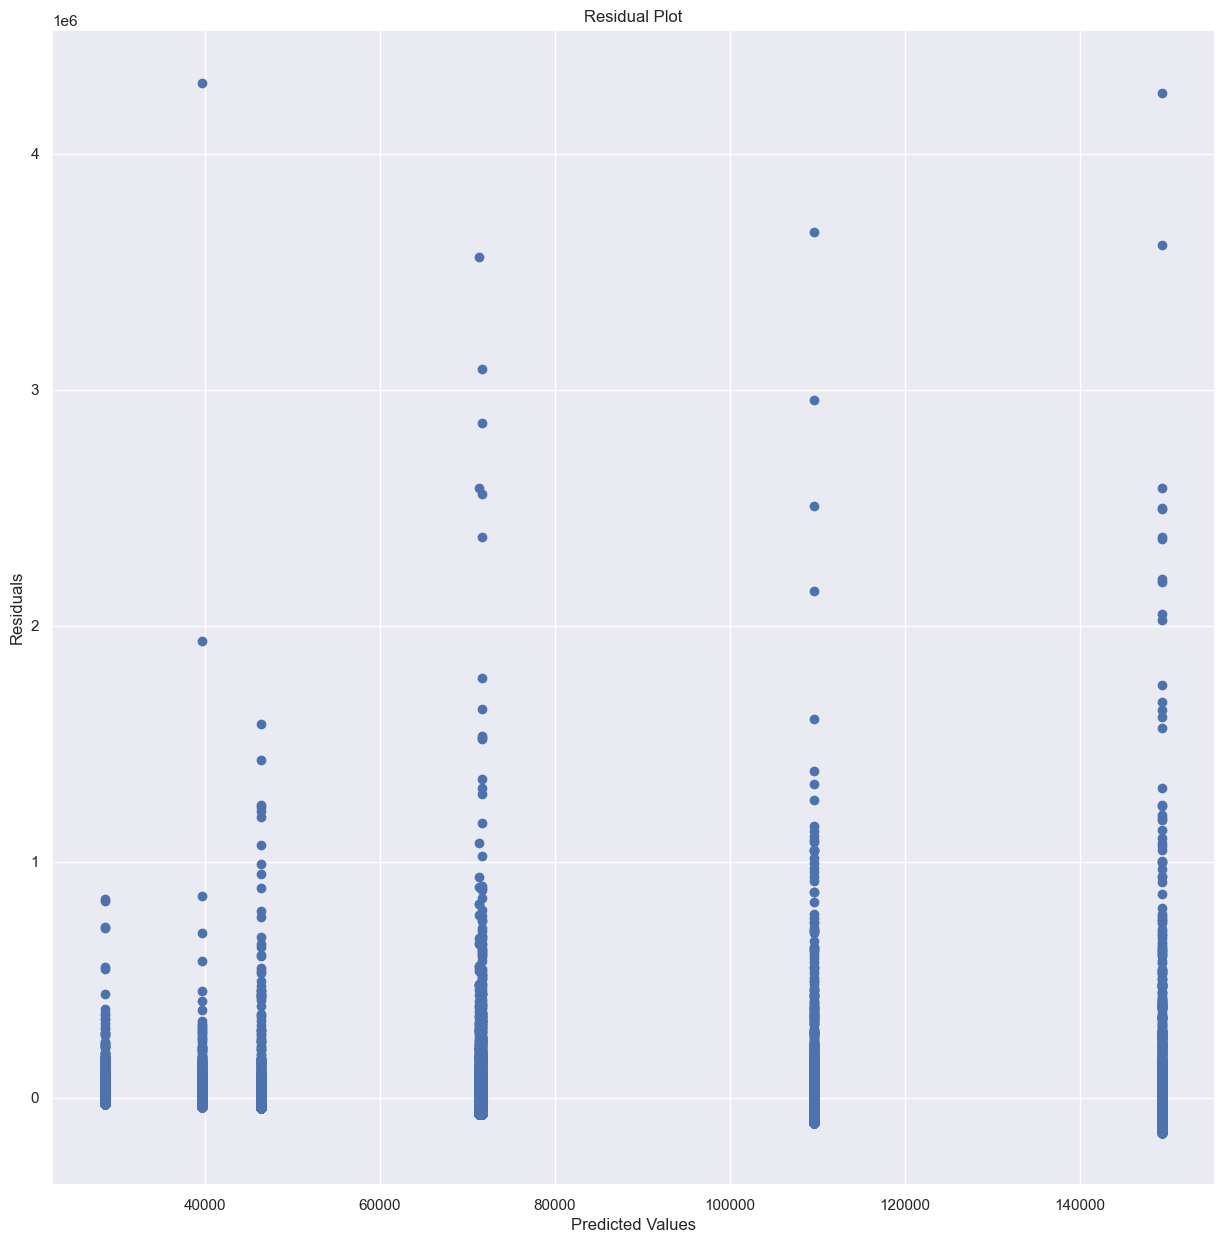

R-squared: 0.05066459424857872


In [107]:
# Create a scatter plot of the predicted values versus the actual values
plt.scatter(y_test, y_tuned_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.show()

# Create a residual plot
residuals = y_test - y_tuned_pred
plt.scatter(y_tuned_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Calculate the R-squared value
r_squared = r2_score(y_test, y_tuned_pred)
print('R-squared:', r_squared)

C:\Users\PREDATOR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='usage', ylabel='Density'>

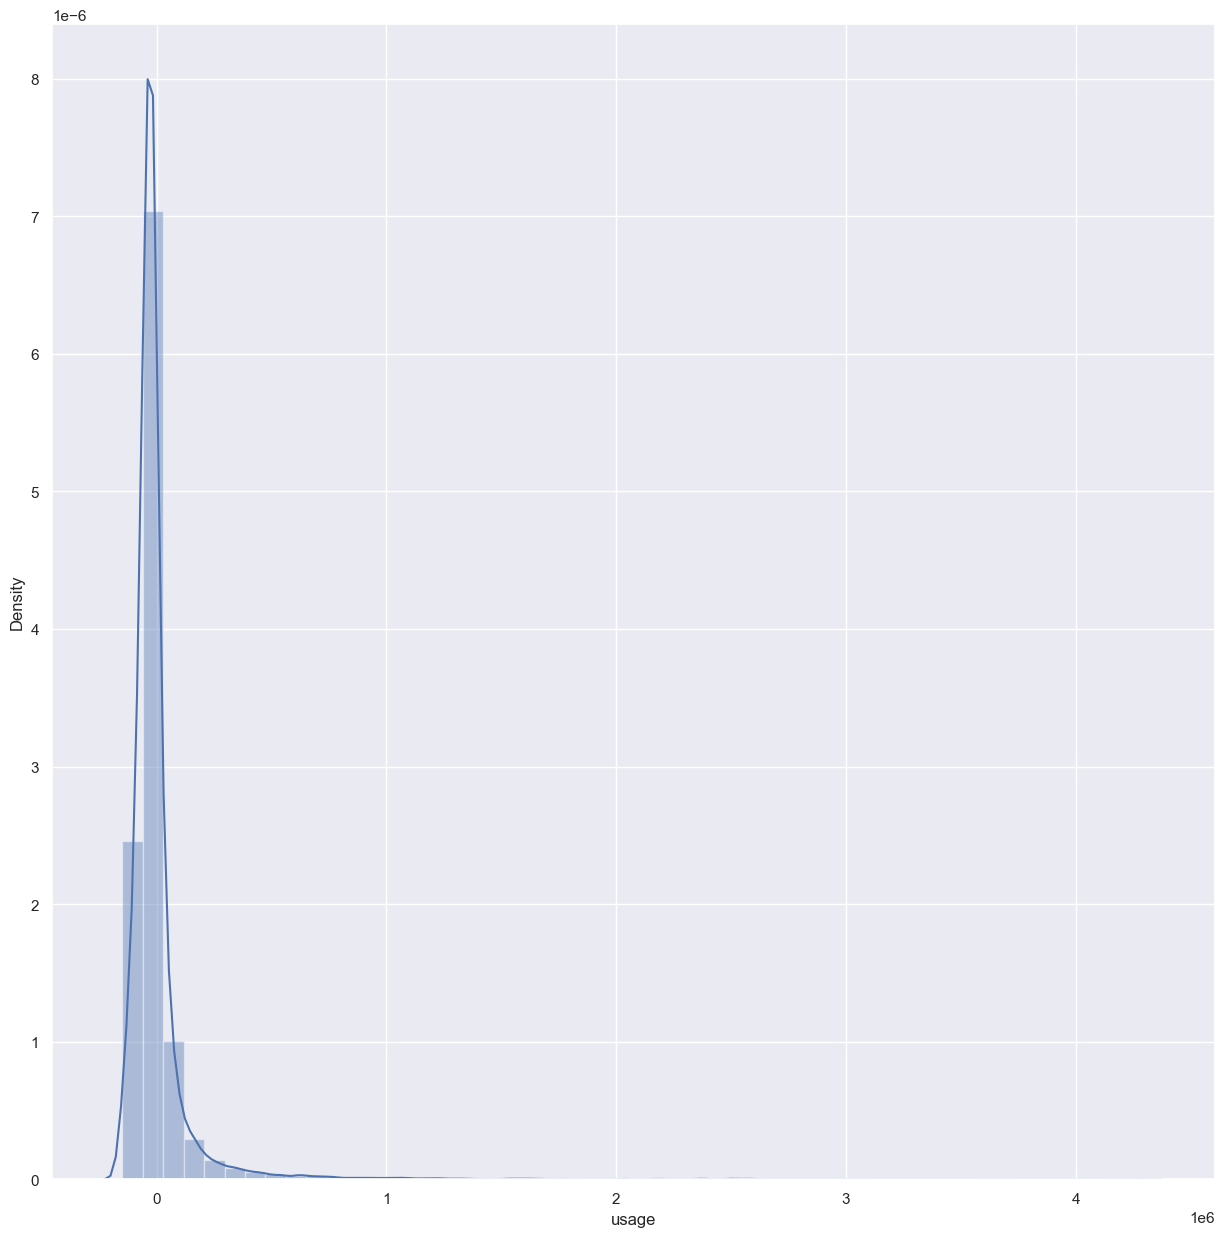

In [108]:
sns.distplot(y_test-y_tuned_pred)

In [109]:
dtree_tuned.feature_importances_
feat_importances= pd.Series(dtree_tuned.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feat_importances

B2B_UTILITY_CODE                   0.620526
B2B_CONTRACT_LABOR_EXPENSE_CODE    0.218532
B2B_SMALL_SIZE_FLAG                0.072429
B2B_WHITE_COLLAR_FLAG              0.062179
B2B_PACKAGE_EXPENSE_CODE           0.026335
B2B_SALES_VOLUME                   0.000000
B2B_PAY_AT_PUMP_FLAG               0.000000
B2B_PAYROLL_EXPENSE_CODE           0.000000
B2B_PRIMARY_SIC_DESCRIP            0.000000
B2B_PRIMARY_SIC_FLAG               0.000000
B2B_PRIMARY_SITE_FLAG              0.000000
B2B_PURCHASE_ADMIN_EXPENSE_CODE    0.000000
B2B_PURCHASE_PRINT_EXPENSE_CODE    0.000000
B2B_REST_LEASE_EXPENSE_CODE        0.000000
B2B_ADDR_STATE                     0.000000
B2B_SECONDARY_SIC_DESCRIP1         0.000000
B2B_OFFICE_SUPPLY_EXPENSE_CODE     0.000000
B2B_SIC_DESCRIP                    0.000000
B2B_STATE_CODE                     0.000000
B2B_TELECOMMUNICATIONS_CODE        0.000000
B2B_TENANT_FLAG                    0.000000
B2B_TRUE_FRNCHSE_FLAG              0.000000
B2B_WEALTH_FLAG                 

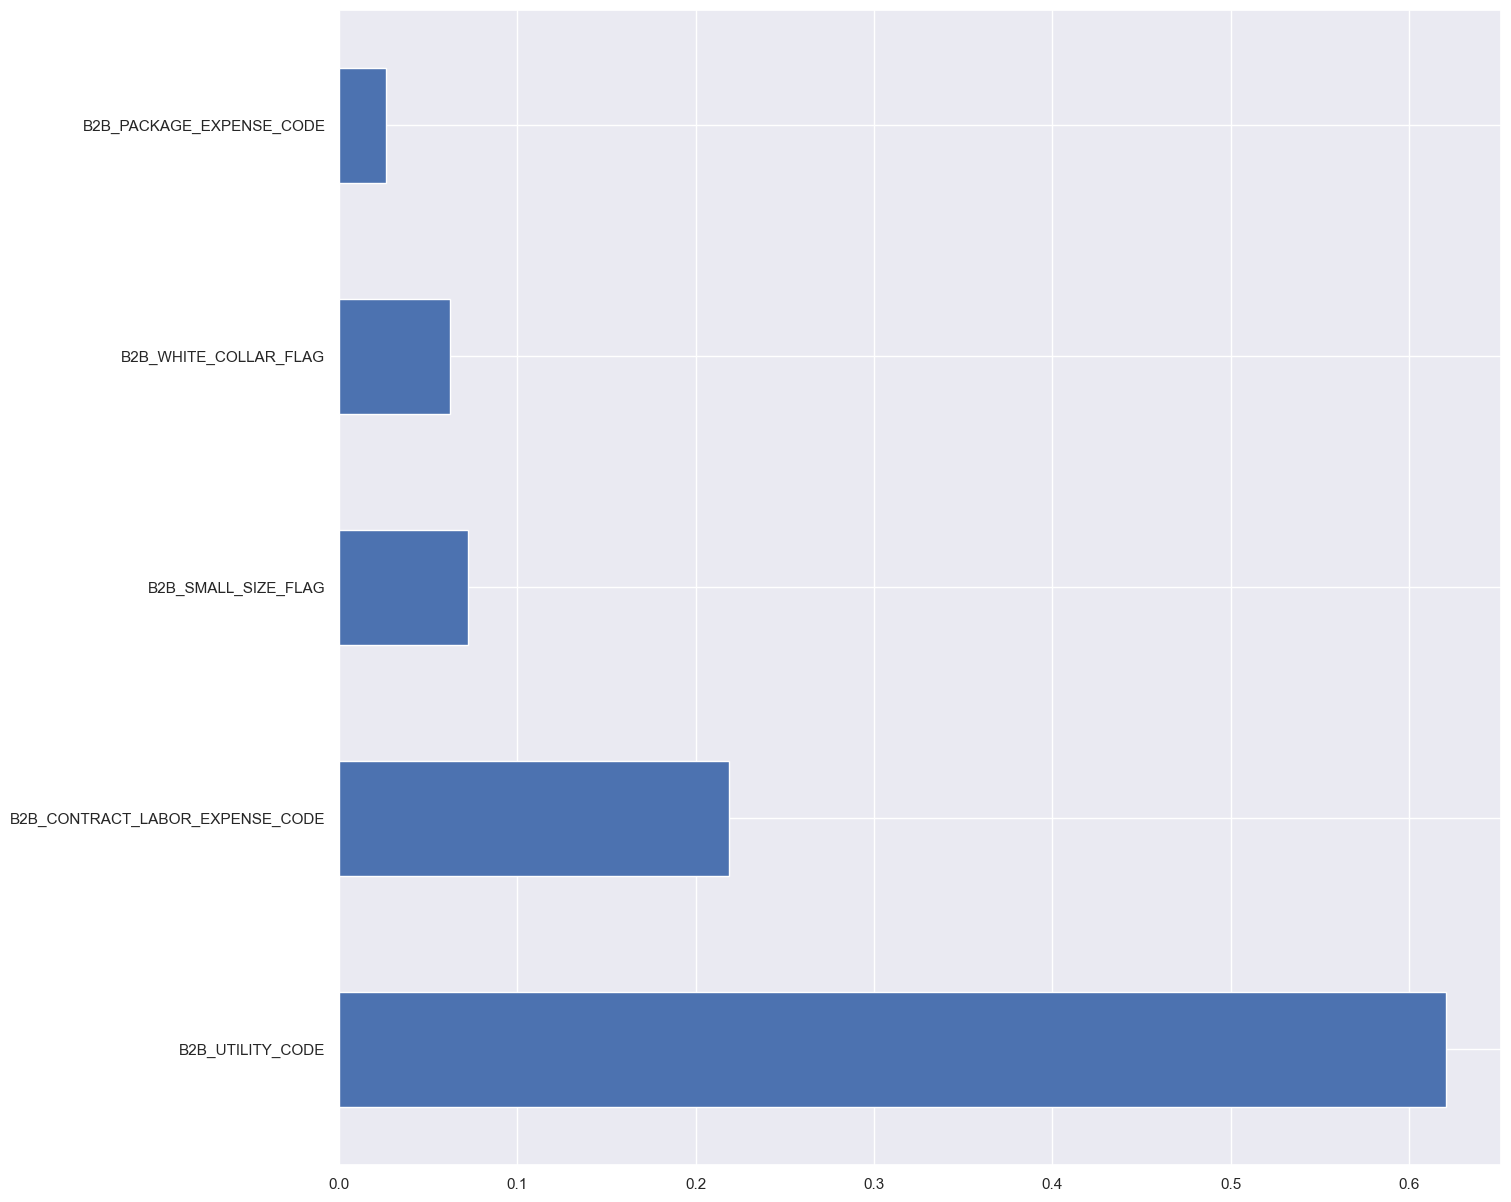

In [110]:
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

A confusion matrix is typically used after training a classification model, including decision trees, to evaluate the performance of the model on a validation or test set. The confusion matrix allows you to see the number of true positives, false positives, true negatives, and false negatives generated by the model, which can help you understand how well the model is performing and identify any areas for improvement.

By contrast, decision trees are a type of supervised learning algorithm that can be used for both classification and regression tasks. Decision trees are used to create a model that predicts the value of a target variable based on several input variables or features. The decision tree algorithm works by recursively splitting the data based on the most informative features, with the goal of creating subsets of the data that are more homogeneous with respect to the target variable.

In [ ]:
#from sklearn.metrics import classification_report,confusion_matrix
#display(confusion_matrix(y_test,predictions))

plot the confusion matrix

In [ ]:
#from sklearn.metrics import ConfusionMatrixDisplay

#cm = confusion_matrix(y_test,predictions)
#cmd = ConfusionMatrixDisplay(cm, display_labels= df_train_data['usage'])
#cmd.plot()

In [ ]:
#display(classification_report(y_test,predictions))

visualize the tree

In [ ]:
#import sys
#!{sys.executable} -m pip install pydot
#!{sys.executable} -m pip install graphviz

from IPython.display import Image
import six
import graphviz
#from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
import pydot

features = list(independents.columns[:])
features

In [ ]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz

#import sys
#!{sys.executable} -m pip install pydotplus

import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()

export_graphviz(dtree_tuned,filled=True,rounded=True, feature_names=X_train.columns, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())


In [ ]:
# Square foot num _ Employee size , ulti code, employ num

---
## Random Forests <a class="anchor" id="RandomForests"></a>

In [111]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100,max_depth=12,max_features='auto',max_leaf_nodes=20,min_samples_leaf=5,min_weight_fraction_leaf=0.1,criterion="squared_error")
#{'max_depth': 5,
# 'max_features': 'auto',
# 'max_leaf_nodes': None,
# 'min_samples_leaf': 1,
# 'min_weight_fraction_leaf': 0.1,
# 'splitter': 'best'}
rfr.fit(X_train, y_train)

C:\Users\PREDATOR\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=12, max_features='auto', max_leaf_nodes=20,
                      min_samples_leaf=5, min_weight_fraction_leaf=0.1)

In [112]:
y_pred = rfr.predict(X_test)

In [113]:
rfr.score(X_train,y_train)

0.060155056854085065

In [114]:
rfr.score(X_test,y_test)

0.06455003146614258

Mean squared error: 28151015665.46
Mean absolute error: 66667.38
R-squared: 0.06


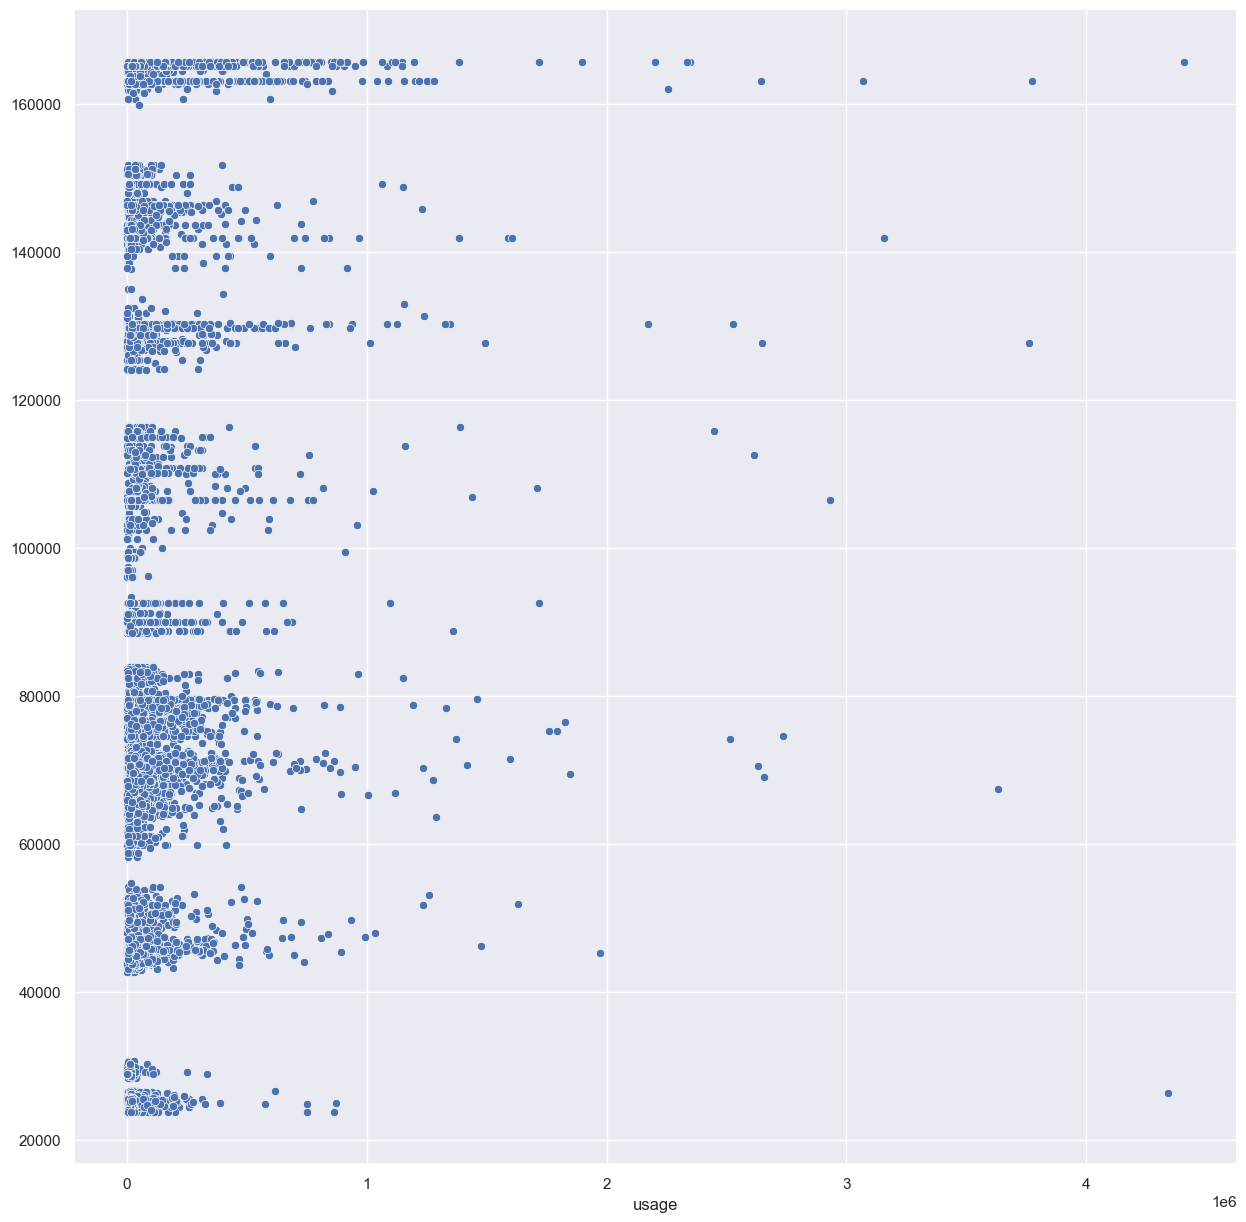

In [115]:
# Calculate evaluation metrics using predicted values and actual values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualize the predicted values and actual values using a scatter plot
sns.scatterplot(x=y_test, y=y_pred)

# Display the evaluation metrics
print("Mean squared error: {:.2f}".format(mse))
print("Mean absolute error: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))

In [116]:
parameters={"criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [117]:
tuning_model=GridSearchCV(rfr,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [118]:
%%capture

start_time=timer(None)

#tuning_model.fit(X,y)

timer(start_time)

In [119]:
tuning_model.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [120]:
tuning_model.best_score_

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [121]:
rfr_tuned = RandomForestRegressor(n_estimators=100,)
rfr_tuned.fit(X_train,y_train)
# prediction 
y_tuned_pred=rfr_tuned.predict(X_test)

KeyboardInterrupt: 

Mean squared error: 28568877842.79
Mean absolute error: 67648.96
R-squared: 0.05


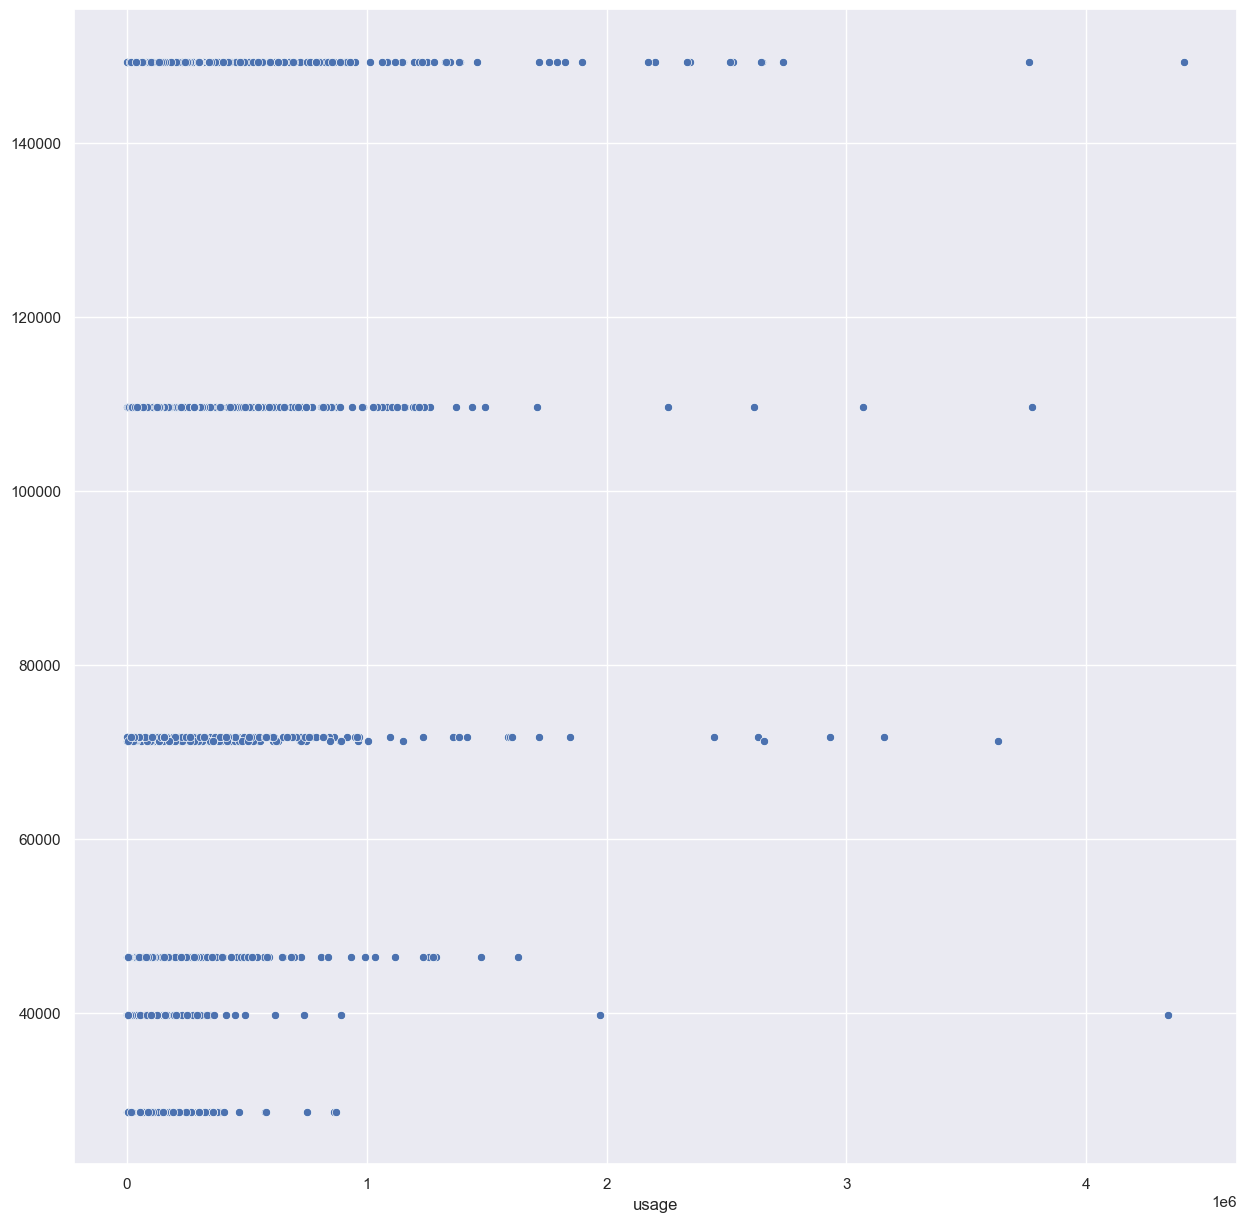

In [122]:
# Calculate evaluation metrics using predicted values and actual values
mse = mean_squared_error(y_test, y_tuned_pred)
mae = mean_absolute_error(y_test, y_tuned_pred)
r2 = r2_score(y_test, y_tuned_pred)

# Visualize the predicted values and actual values using a scatter plot
sns.scatterplot(x=y_test, y=y_tuned_pred)

# Display the evaluation metrics
print("Mean squared error: {:.2f}".format(mse))
print("Mean absolute error: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))

In [123]:
rfr.feature_importances_
feat_importances= pd.Series(rfr.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feat_importances

B2B_UTILITY_CODE                   0.473376
B2B_BUSINESS_SQUARE_FOOT_NUM       0.310110
B2B_NAICS1_DESCRIP                 0.065326
B2B_SMALL_SIZE_FLAG                0.054395
B2B_PACKAGE_EXPENSE_CODE           0.046132
B2B_PAYROLL_EXPENSE_CODE           0.013911
B2B_COMPUTER_EXPENSE_CODE          0.009809
B2B_SALES_VOLUME                   0.006488
B2B_SECONDARY_SIC_DESCRIP1         0.006109
B2B_NAICS_CODE_DESCRIP             0.005197
B2B_ADVERTISING_EXPENSE_CODE       0.002965
B2B_INSURANCE_EXPENSE_CODE         0.001604
B2B_SIC_DESCRIP                    0.001104
B2B_WHITE_COLLAR_FLAG              0.000861
B2B_ADDR_STATE                     0.000779
B2B_PRIMARY_SIC_DESCRIP            0.000556
B2B_STATE_CODE                     0.000538
B2B_PURCHASE_PRINT_EXPENSE_CODE    0.000301
B2B_ACCOUNTING_EXPENSE_CODE        0.000256
CAC_SEGMENT                        0.000181
B2B_MEDIUM_SIZE_FLAG               0.000000
B2B_EMPLOYEE_DERVTN_FLAG           0.000000
B2B_AD_SIZE                     

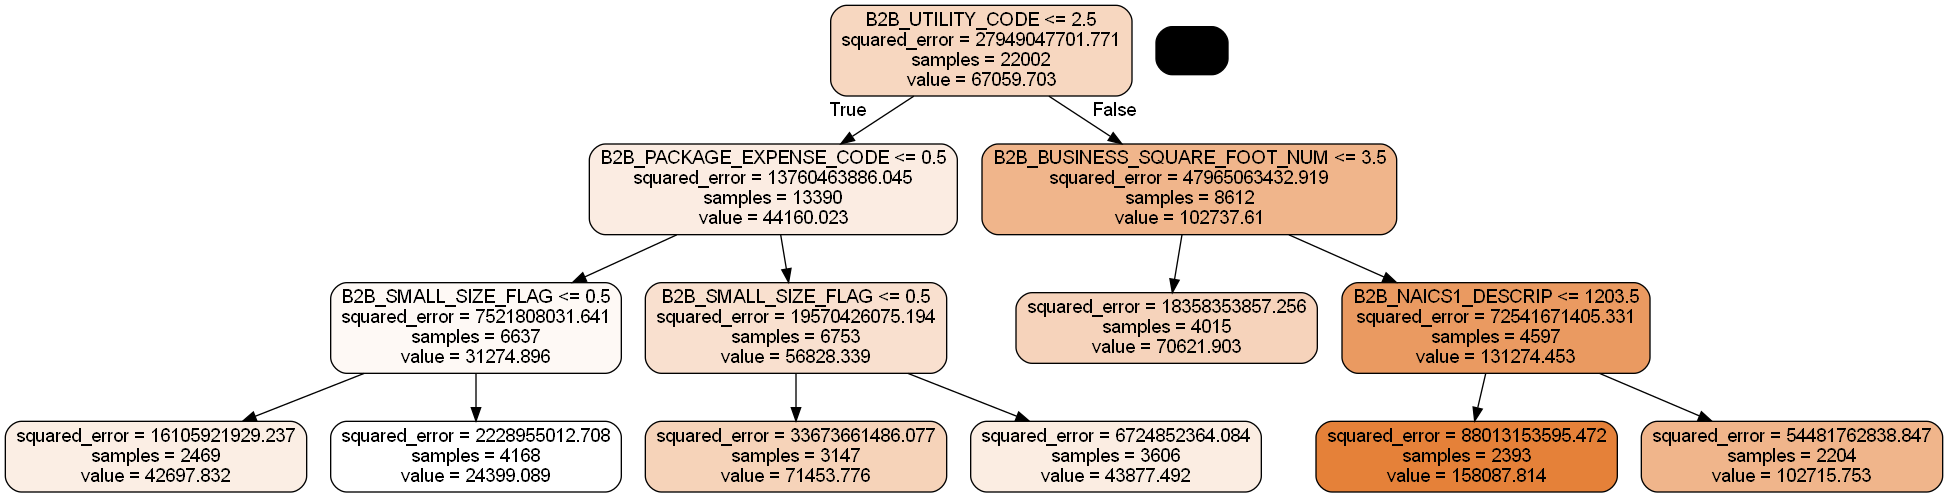

In [124]:
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz

#import sys
#!{sys.executable} -m pip install pydotplus

import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()

export_graphviz(rfr.estimators_[0],filled=True,rounded=True, feature_names=X_train.columns ,out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

## Naive Bayers <a class="anchor" id="NaiveBayers"></a>

In [125]:
y_new_status = df["status"]
y_new_status

0        FINALLED
1          ACTIVE
2        FINALLED
3        FINALLED
4          ACTIVE
           ...   
49479    FINALLED
49480      ACTIVE
49481      ACTIVE
49482      ACTIVE
49483    FINALLED
Name: status, Length: 49484, dtype: object

In [126]:
y_new_status.unique()

array(['FINALLED', 'ACTIVE', 'EXPECT FINALLED'], dtype=object)

In [127]:
print(X.shape, y_new_status.shape)

(49484, 47) (49484,)


In [129]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_labels = le.fit_transform(y_new_status)
#print(numerical_labels)
print(le.inverse_transform(y_labels))

['FINALLED' 'ACTIVE' 'FINALLED' ... 'ACTIVE' 'ACTIVE' 'FINALLED']


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.30)

In [131]:
y_train

array([2, 0, 2, ..., 2, 0, 0])

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2%}".format(accuracy))

Accuracy: 53.87%


In [133]:
# Predict
print(le.inverse_transform(gnb.predict(X_test[1:2])))

['FINALLED']


---
## K-Nearest Neighbor (K-NN) <a class="anchor" id="KNN"></a>

In [ ]:
# Setting independent variables
df["B2B_EMPLOYEE_SIZE",
"B2B_BUSINESS_STATUS_CODE",
"B2B_OFFICE_SIZE",
"B2B_TOT_EMPLOYEE_SIZE",
"B2B_PUBLIC_INDICATOR",
"B2B_IMPORT_EXPORT_FLAG",
"B2B_GOVERNMENT_FLAG",
"B2B_BUSINESS_SQUARE_FOOT_NUM",
"B2B_OWN_LEASE_FLAG",
"B2B_BIG_BUSINESS_INDICATOR",
"B2B_SMALL_SIZE_FLAG",
"B2B_MEDIUM_SIZE_FLAG",
"B2B_HIGH_TECH_FLAG",
"B2B_RESTAURANT_SRVCE_TYPE",
"B2B_TELECOMMUNICATIONS_CODE",
"B2B_UTILITY_CODE",
"B2B_COMPUTER_EXPENSE_CODE",
"B2B_PURCHASE_PRINT_EXPENSE_CODE",
"CAC_SEGMENT",
"B2B_WHITE_COLLAR_PRCNT"]
